<a href="https://colab.research.google.com/github/Gh0st116/clothes-classification/blob/main/clothes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import keras.optimizers as opt
import keras.callbacks as callbacks
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
# Mounting google drive
#from google.colab import drive
# from google.colab import drive

# drive.mount(‘/content/drive’)

In [3]:
# Loading dataset from Keras MNIST and separating into train and test data
dataset = keras.datasets.fashion_mnist
((train_imgs, train_ids), (test_imgs, test_ids)) = dataset.load_data()

In [4]:
print(train_imgs)
print(len(train_imgs), "train images")
print(f"train shape: {train_imgs.shape}")
print(f"test shape: {test_imgs.shape}")

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
60000 train images
train shape: (60000, 28, 28)
test shape: (10000, 28, 28)


# Train Images

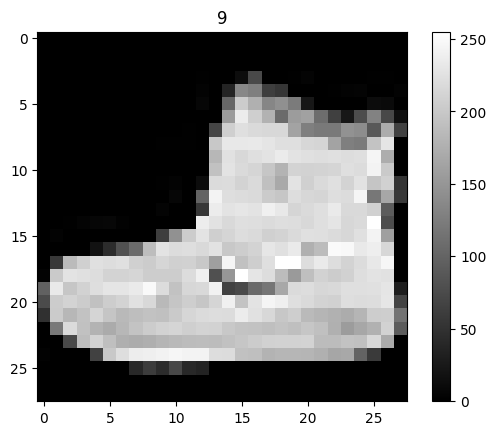

In [5]:
# Print first image in dataset in grayscale
plt.imshow(train_imgs[0], cmap='gray')
plt.title(train_ids[0])
plt.colorbar()

In [6]:
total_classifications = train_ids.max() + 1
name_classifications = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

total_classifications

10

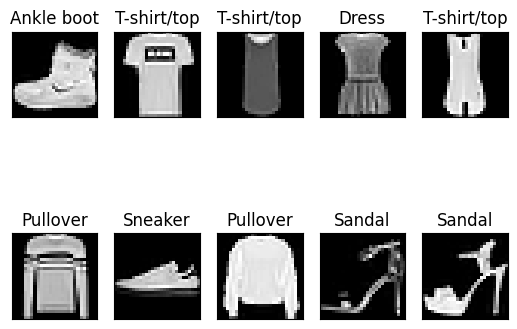

In [7]:
for img in range(10):
  plt.subplot(2, 5, img + 1)
  plt.imshow(train_imgs[img], cmap='gray')
  plt.title(name_classifications[train_ids[img]])
  plt.xticks([])
  plt.yticks([])

# Creating Model

In [8]:
# Normalizing images
train_imgs = train_imgs / 255.0

In [9]:
model = keras.Sequential([
    # Input
    keras.layers.Flatten(input_shape=(28, 28)),
    # Processing
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    # Output
    keras.layers.Dense(total_classifications, activation=tf.nn.softmax)
])

adam = opt.Adam(learning_rate=0.0015)

callbacks = [callbacks.EarlyStopping(monitor='val_loss'),
             callbacks.ModelCheckpoint(
                filepath="model_checkpoint.hdf5",
                monitor='val_loss',
                save_best_only=True
             )
]

# Compiling
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model summary

In [10]:
summary = model.summary()
print(summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [11]:
def fit_model():
  return model.fit(
      train_imgs,
      train_ids,
      batch_size=480,
      epochs=5,
      validation_split=0.2,
      callbacks=callbacks
  )

In [12]:
history = fit_model()

Epoch 1/5
100/100 [==============================] - 6s 48ms/step - loss: 0.6662 - accuracy: 0.7680 - val_loss: 0.4614 - val_accuracy: 0.8418
Epoch 2/5
100/100 [==============================] - 4s 38ms/step - loss: 0.4455 - accuracy: 0.8450 - val_loss: 0.4061 - val_accuracy: 0.8579
Epoch 3/5
100/100 [==============================] - 4s 35ms/step - loss: 0.4007 - accuracy: 0.8561 - val_loss: 0.3919 - val_accuracy: 0.8593
Epoch 4/5
100/100 [==============================] - 5s 51ms/step - loss: 0.3713 - accuracy: 0.8663 - val_loss: 0.3588 - val_accuracy: 0.8705
Epoch 5/5
100/100 [==============================] - 4s 39ms/step - loss: 0.3491 - accuracy: 0.8748 - val_loss: 0.3565 - val_accuracy: 0.8710


# Saving model

In [13]:
model.save("model_clothes.h5")
saved_model = load_model("model_clothes.h5")

# Plotting metrics

In [14]:
def plot_accuracy(hist, title = "Epoch accuracy"):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["train", "validation"])

def plot_loss(hist, title = "Epoch loss"):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["train", "validation"])

def plot_acc_loss(hist, title_acc = "Epoch accuracy", title_loss = "Epoch Loss"):
  plt.figure(figsize=(11, 4))

  plt.subplot(1, 2, 1)
  plot_accuracy(hist, title_acc)

  plt.subplot(1, 2, 2)
  plot_loss(hist, title_loss)

  plt.subplots_adjust(wspace=0.3)

  plt.show()

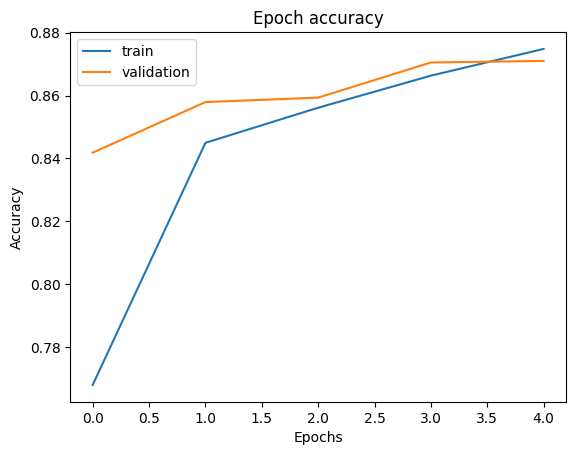

In [15]:
plot_accuracy(history)

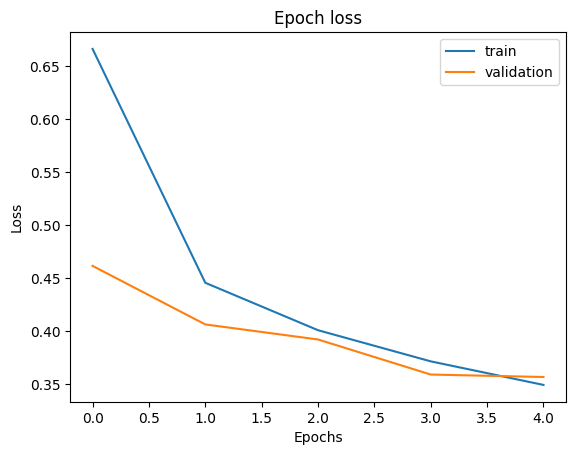

In [16]:
plot_loss(history)

# Experimenting with weights and biases

Getting weights and biases from the first dense layer

In [17]:
weights_dense = model.layers[1].get_weights()[0]
weights_dense

array([[ 0.03407075, -0.02688826,  0.0126711 , ...,  0.0595613 ,
         0.06347797, -0.07080768],
       [ 0.10797162, -0.03183119,  0.05299946, ..., -0.08987168,
         0.13431558, -0.06983391],
       [ 0.07695206,  0.05295872,  0.18979011, ..., -0.09014018,
         0.13397683, -0.00825156],
       ...,
       [-0.0810469 ,  0.02078842,  0.00411631, ..., -0.05703897,
         0.05180978,  0.01445197],
       [-0.16254987, -0.00852871,  0.01892442, ..., -0.07489686,
         0.0894789 ,  0.00265305],
       [ 0.01120386, -0.01265705, -0.01431036, ..., -0.08587519,
         0.11584001,  0.01245374]], dtype=float32)

In [18]:
biases_dense = model.layers[1].get_weights()[1]
biases_dense

array([ 0.09983145, -0.01160267,  0.10615202,  0.12965964, -0.01402499,
       -0.04919112,  0.14605387,  0.18046334,  0.00934225,  0.01863041,
        0.14659259, -0.15074   ,  0.10535404,  0.2061062 ,  0.0468944 ,
       -0.05461506, -0.01061018, -0.0033212 ,  0.04860962, -0.01575783,
        0.13365823,  0.07153975, -0.10054983, -0.01126801, -0.0024109 ,
        0.07922151, -0.03705153, -0.00899148,  0.08845786,  0.07908358,
       -0.11324637,  0.04726315,  0.15631701, -0.07351615, -0.01152142,
       -0.00959025,  0.02545493,  0.07973827,  0.03995768,  0.145197  ,
        0.10339063, -0.02912292,  0.05704177,  0.0559072 , -0.03608986,
       -0.12926494, -0.02863972,  0.24570054,  0.11062101,  0.07298442,
       -0.04430396, -0.01536712,  0.1952403 ,  0.06010304, -0.05219664,
        0.12703012,  0.11790241,  0.00814946, -0.11147562,  0.14695074,
        0.02245502, -0.05470606,  0.21870987,  0.14659025,  0.12031192,
        0.00588145,  0.05856968,  0.01346177, -0.06403881,  0.07

Altering weights from dense layer

In [19]:
weights_dense.shape

(784, 256)

Epoch 1/5
100/100 [==============================] - 3s 26ms/step - loss: 0.7248 - accuracy: 0.7463 - val_loss: 0.4845 - val_accuracy: 0.8297
Epoch 2/5
100/100 [==============================] - 2s 22ms/step - loss: 0.4668 - accuracy: 0.8370 - val_loss: 0.4277 - val_accuracy: 0.8507
Epoch 3/5
100/100 [==============================] - 2s 19ms/step - loss: 0.4247 - accuracy: 0.8508 - val_loss: 0.4006 - val_accuracy: 0.8562
Epoch 4/5
100/100 [==============================] - 2s 17ms/step - loss: 0.3969 - accuracy: 0.8596 - val_loss: 0.3785 - val_accuracy: 0.8650
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 0.3801 - accuracy: 0.8654 - val_loss: 0.3704 - val_accuracy: 0.8679


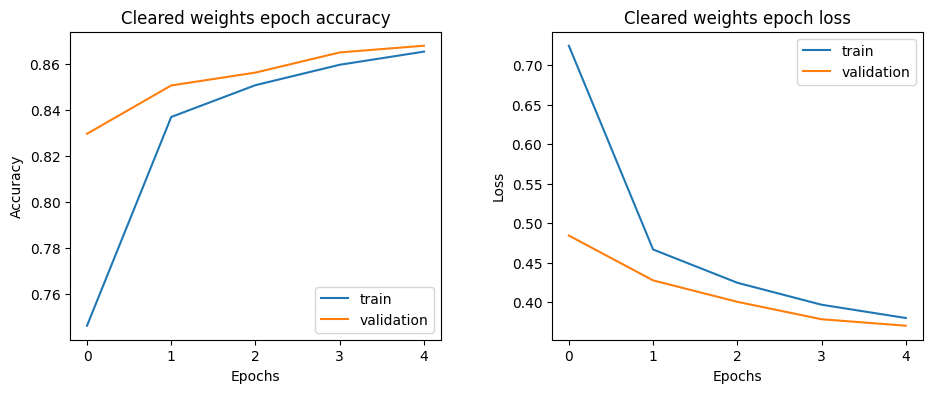

In [20]:
cleared_weights_dense = np.zeros((784, 256))
random_weights_dense = np.random.rand(784, 256)

model.layers[1].set_weights(
    [cleared_weights_dense, biases_dense]
)

# Model fitness with all weights in Dense cleared
plot_acc_loss(fit_model(), "Cleared weights epoch accuracy", "Cleared weights epoch loss")

Epoch 1/5
100/100 [==============================] - 2s 18ms/step - loss: 160.6152 - accuracy: 0.3029 - val_loss: 15.3973 - val_accuracy: 0.6892
Epoch 2/5
100/100 [==============================] - 2s 22ms/step - loss: 48.7494 - accuracy: 0.4997 - val_loss: 11.6821 - val_accuracy: 0.7249
Epoch 3/5
100/100 [==============================] - 2s 25ms/step - loss: 33.4054 - accuracy: 0.5664 - val_loss: 11.5571 - val_accuracy: 0.7177
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 24.7511 - accuracy: 0.6074 - val_loss: 8.7726 - val_accuracy: 0.7504
Epoch 5/5
100/100 [==============================] - 2s 16ms/step - loss: 19.2328 - accuracy: 0.6322 - val_loss: 8.2778 - val_accuracy: 0.7520


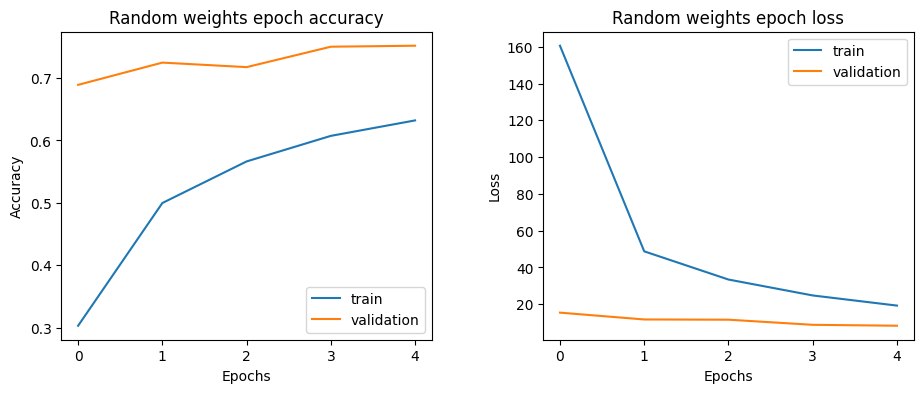

In [21]:
model.layers[1].set_weights(
    [random_weights_dense, biases_dense]
)

# Model fitness with random weights in dense layer
plot_acc_loss(fit_model(), "Random weights epoch accuracy", "Random weights epoch loss")

Altering biases from dense layer

In [22]:
biases_dense.shape

(256,)

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 67.5704 - accuracy: 0.2654 - val_loss: 9.7142 - val_accuracy: 0.5625
Epoch 2/5
100/100 [==============================] - 2s 18ms/step - loss: 26.8725 - accuracy: 0.4368 - val_loss: 7.9390 - val_accuracy: 0.6476
Epoch 3/5
100/100 [==============================] - 2s 20ms/step - loss: 19.7661 - accuracy: 0.4959 - val_loss: 7.3096 - val_accuracy: 0.6526
Epoch 4/5
100/100 [==============================] - 3s 27ms/step - loss: 14.7674 - accuracy: 0.5345 - val_loss: 7.0014 - val_accuracy: 0.6562
Epoch 5/5
100/100 [==============================] - 2s 18ms/step - loss: 11.7635 - accuracy: 0.5575 - val_loss: 5.0378 - val_accuracy: 0.6701


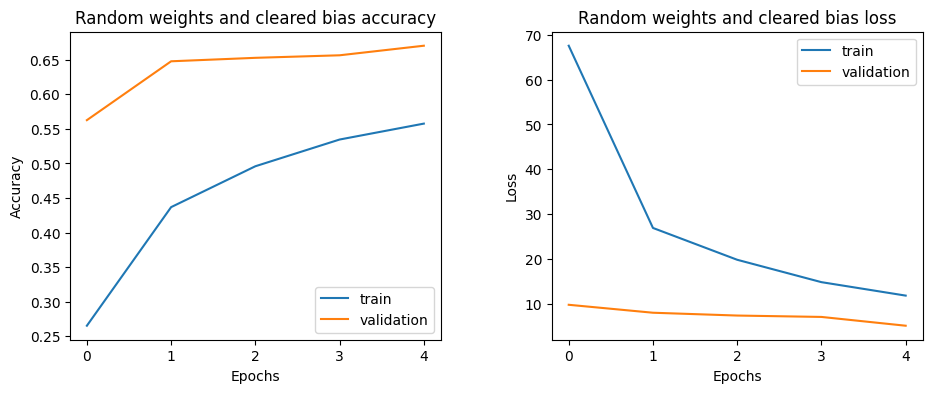

In [23]:
cleared_biases_dense = np.zeros((256,))

model.layers[1].set_weights(
    [random_weights_dense, cleared_biases_dense]
)

plot_acc_loss(fit_model(), "Random weights and cleared bias accuracy", "Random weights and cleared bias loss")

In [24]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

# Model predictions

In [25]:
tests = model.predict(test_imgs)
print(f"Image predict: {name_classifications[np.argmax(tests[0])]}")

tests_saved_model = saved_model.predict(test_imgs)
print(f"Image predict of saved model: {name_classifications[np.argmax(tests_saved_model[0])]}")

print(f"Actual value: {name_classifications[train_ids[0]]}")

313/313 [==============================] - 1s 2ms/step
Image predict: Ankle boot
313/313 [==============================] - 1s 2ms/step
Image predict of saved model: Ankle boot
Actual value: Ankle boot


# Evaluating model

In [26]:
loss_test, accuracy_test = model.evaluate(test_imgs, test_ids)

print(f"Loss: {loss_test}")
print(f"Accuracy: {accuracy_test}")

313/313 [==============================] - 1s 3ms/step - loss: 1450.2006 - accuracy: 0.6482
Loss: 1450.2005615234375
Accuracy: 0.6481999754905701
